In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_C_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,NaN,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4
float64		column 2	8
float64		column 3	11
float64		column 4	7


In [4]:
df.describe()

,column 1,column 2,column 3,column 4
count,146.000000,142.000000,139.000000,143.000000
mean,5.830822,3.047183,3.719424,1.195105
std,0.834809,0.436734,1.748327,0.772533
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.550000,0.300000
50%,5.750000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

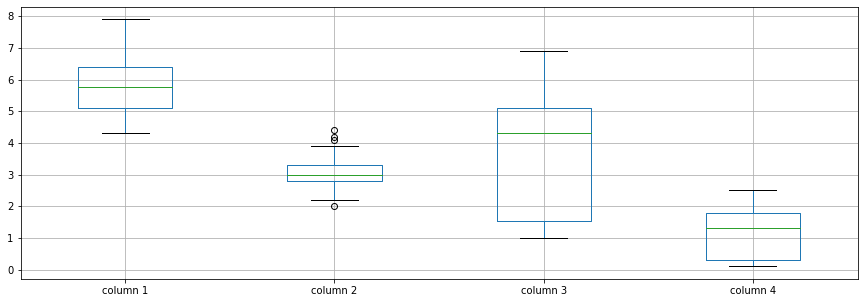

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    5.830822
column 2    3.047183
column 3    3.719424
column 4    1.195105
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,-0.109042,0.868124,0.820555
column 2,-0.109042,1.000000,-0.420594,-0.334811
column 3,0.868124,-0.420594,1.000000,0.964789
column 4,0.820555,-0.334811,0.964789,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [4,4+18,4+18+18,4+18+18+18,4+18+18,4+18,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 13.842619789971245
Epoch: 1 , loss: 13.692758560180664
Epoch: 2 , loss: 13.742946200900608
Epoch: 3 , loss: 13.703982565138075
Epoch: 4 , loss: 13.765671836005318
Epoch: 5 , loss: 13.704946835835775
Epoch: 6 , loss: 13.718512429131401
Epoch: 7 , loss: 13.731143633524576
Epoch: 8 , loss: 13.858097394307455
Epoch: 9 , loss: 13.765167872111002
Epoch: 10 , loss: 13.661163965861002
Epoch: 11 , loss: 13.770190768771702
Epoch: 12 , loss: 13.742815759446886
Epoch: 13 , loss: 13.740524503919813
Epoch: 14 , loss: 13.68475447760688
Epoch: 15 , loss: 13.779302703009712
Epoch: 16 , loss: 13.716421551174587
Epoch: 17 , loss: 13.760204209221733
Epoch: 18 , loss: 13.771446545918783
Epoch: 19 , loss: 13.789718416002062
Epoch: 20 , loss: 13.664961602952745
Epoch: 21 , loss: 13.785145971510145
Epoch: 22 , loss: 13.605126910739475
Epoch: 23 , loss: 13.734238094753689
Epoch: 24 , loss: 13.81089030371772
Epoch: 25 , loss: 13

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    5.1
column 2    3.7
column 3    1.5
column 4    0.4
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.0
...,...,...,...,...
145,0.0,-2.985066,0.0,0.0
146,0.0,0.000000,0.0,0.0
147,0.0,0.000000,0.0,0.0
148,0.0,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(22.111633859112917, 97.653468960401)

In [17]:
NRMS=numerator/denominator
NRMS


0.22642957894388066

In [18]:
new_df.iloc[66,:]

column 1    5.6
column 2    3.0
column 3    4.5
column 4    1.5
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,5.1,3.500000,1.4,0.2
1,4.9,3.000000,1.4,0.2
2,4.7,3.200000,1.3,0.2
3,4.6,3.100000,1.5,0.2
4,5.0,3.600000,1.4,0.2
...,...,...,...,...
145,6.7,0.014934,5.2,2.3
146,6.3,2.500000,5.0,1.9
147,6.5,3.000000,5.2,2.0
148,6.2,3.400000,5.4,2.3


In [20]:
imputations[-1].to_excel("Iris_C_5(imp).xlsx", index=False, header=False)